Reinforcement Learing: Q-Learning

In [1]:
import numpy as np

In [2]:
class State: # a class to generate states in an MDP
    
    # initialize the state
    def __init__(self, state_name, actions, probabilities, rewards, Q):
        
        self.state_name = state_name
        self.actions = actions
        self.probabilities = probabilities
        self.rewards = rewards       
        self.Q = Q
        self.counter = 0
        self.visits = 0
        self.active = False
        

In [3]:
class MDP: # a class to generate an MDP from given input data
    
    # initialize the MDP
    def __init__(self, statespace, probabilities, rewards, actions, discount, Q, epsilon, gamma):
        
            
        # parameter initialization
        self.statespace = statespace
        self.discount = discount
        self.gamma = gamma

        self.states = [] # a list to hold objects
        for i in range(len(self.statespace)):
            self.states.append(State(i, actions[i], probabilities[i], rewards[i], Q[i]))

        # performance indicators
        self.iterations = 0
        #print("Initialized MDP")
        #print("-------------------------------------")
        
    
    # define a function to generate a random state at the beginning of the process
    def init_random_state(self):
        self.currentstate = np.random.choice(self.states, size=1, replace=False)[0]
        self.currentstate.active = True # activate new state
        #print("Initial state:", self.currentstate.state_name)
        #print("-------------------------------------")
        
    # define a function to return Q
    def return_Q(self):
        Q = []
        for i in self.states:
            Q.append(i.Q)
        return(Q)
    
    def greedy_action_policy(self, epsilon):
        
        # flip a coin to decide whether to explore or exploit
        decider = np.random.binomial(size = 1, n = 1, p = epsilon)[0]

        # choose index of action to perform
        if decider == 1:
            # if true play random arm
            action = np.random.choice(self.currentstate.actions, size = 1, replace = False)[0]
            #print("Explore action:", action)
            
        else:
            # if false play the arm with the highest probability
            action = np.where(self.currentstate.actions == np.argmax(self.currentstate.rewards))[0][0] # tie braker rule: select second one if multiple
            #print("Exploit action:", action)
            
        return(action)
        
        
    # define a function to perform an action on the MDP, which causes the state evolution
    def perform_action(self):
        
        self.iterations += 1
        #print("Iteration: ", self.iterations)
        
        # assign action according to greedy policy
        action = self.greedy_action_policy(epsilon)
        
        if action in self.currentstate.actions: # perform action if it does exist in the set of actions of a state
            nextstate = np.random.choice(self.states, 
                                         p = self.currentstate.probabilities[action],
                                         size=1, replace=False)[0]
            
        else: # if action does not exist, raise an error and choose one randomly
            print("ERROR: Action not available in current state")
            print("Choosing random action instead!")
            action = np.random.choice(self.currentstate.actions, size=1, replace=False)[0]
            nextstate = np.random.choice(self.states, 
                                         p = self.currentstate.probabilities[action], 
                                         size=1, replace=False)[0]
        
                
        # update Q
        
        self.currentstate.Q[action] += gamma * (self.currentstate.rewards[action] + 
                                                self.discount * (np.amax(nextstate.Q)) - 
                                                self.currentstate.Q[action])
        
        # update rewards and counter
        for i in self.states:
            if i.active == True:
                i.counter += 1 # update counter
                
        # update visits and check whether state has been visited before
        #print("Next state: ", nextstate.state_name)
        nextstate.visits += 1 # update number of visits of state
        if nextstate.active == False: # if state not visited before, activate
            nextstate.active = True
                
        # print statistics to keep track of evolution
        #for i in self.states:
        #    print("Visits of state", i.state_name, ":", i.visits)
        #for i in self.states:
        #    print("Q of state", i.state_name, ":", i.Q)
            
        # update the current state
        self.currentstate = nextstate
        #print("-------------------------------------")
    

In [4]:
# Example data
rewards = np.array([[19.5, 15.125, 10, 11.375], [9.125, 8, 9.375], [2, 7.375], [1.375]])

Q = np.array([[0, 0, 0, 0], [0, 0, 0], [0, 0], [0]])

probabilities = np.array([[[1,0,0,0],
                           [0.875, 0.125, 0, 0],
                           [0.625, 0.25, 0.125, 0],
                           [0.125, 0.5, 0.25, 0.125]],
                         
                          [[0.875, 0.125, 0, 0],
                           [0.625, 0.25, 0.125, 0],
                           [0.125, 0.5, 0.25, 0.125]],
                         
                          [[0.625, 0.25, 0.125, 0],
                           [0.125, 0.5, 0.25, 0.125]],
                         
                          [[0.125, 0.5, 0.25, 0.125]]])

statespace = np.array([0,1,2,3])

actions = np.array([[0,1,2,3],[0,1,2],[0,1],[0]]) # each row representing the set of actions per state

discount = 0.9

epsilon = 0.1

gammas = np.array([0.01, 0.1, 0.9])

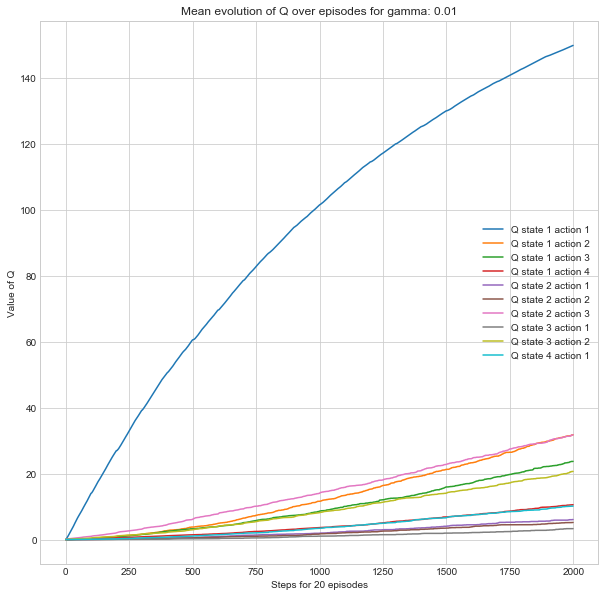

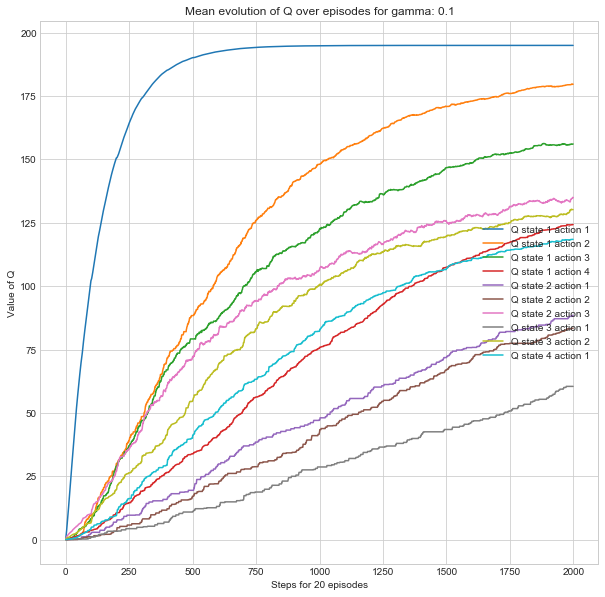

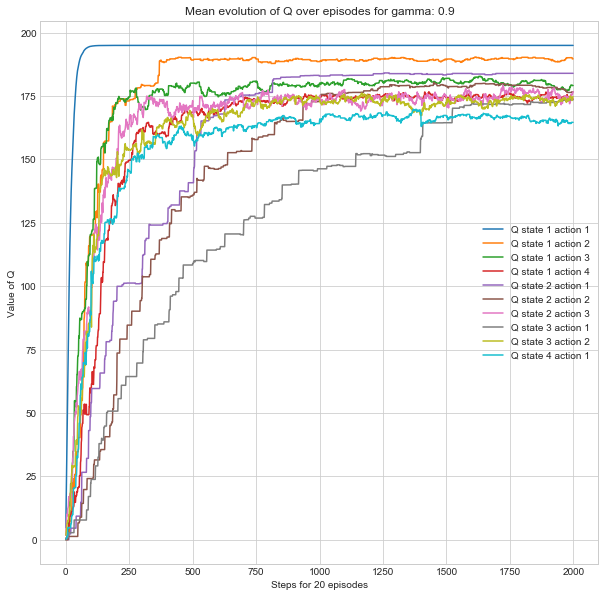

In [5]:
for gamma in gammas:
    
    # initialize number of replications
    replications = 30
    # initialize number of episodes per replication
    episodes = 20
    # initialize number of steps per episode
    steps = 100

    # initialize frames to record Q-values
    Q_vals = 0
    for i in actions:
        Q_vals += len(i)

    Q_rec = [[[] for _ in range(replications)] for _ in range(Q_vals)]


    for k in range(replications):

        np.random.seed(k) # set random seed
        #print("Replication", k)
        Q = np.array([[0, 0, 0, 0], [0, 0, 0], [0, 0], [0]])

        for j in range(episodes):

            #print("Episode", k, ":", j)

            #initialize MDP with random state
            mdp = MDP(statespace, probabilities, rewards, actions, discount, Q, epsilon, gamma)
            mdp.init_random_state()

            # iterate through all steps on each episode
            for i in range(steps):

                # execute action as per policy
                mdp.perform_action() 

                # record the evolution of Q
                evolution_rec = mdp.return_Q()

                Q_rec[0][k].append(evolution_rec[0][0])
                Q_rec[1][k].append(evolution_rec[0][1])
                Q_rec[2][k].append(evolution_rec[0][2])
                Q_rec[3][k].append(evolution_rec[0][3])
                Q_rec[4][k].append(evolution_rec[1][0])
                Q_rec[5][k].append(evolution_rec[1][1])
                Q_rec[6][k].append(evolution_rec[1][2])
                Q_rec[7][k].append(evolution_rec[2][0])
                Q_rec[8][k].append(evolution_rec[2][1])
                Q_rec[9][k].append(evolution_rec[3][0])

            Q = mdp.return_Q()
            
    # calculate averages over replications
    Q_evol = [[] for _ in range(Q_vals)]
    for i in range(Q_vals):
        Q_evol[i] = np.mean(Q_rec[i], axis = 0)
        
    from matplotlib import pyplot as plt

    plt.style.use('seaborn-whitegrid')

    plt.figure(figsize=[10,10])

    t = range(episodes * steps)

    Q1a1 = Q_evol[0]
    Q1a2 = Q_evol[1]
    Q1a3 = Q_evol[2]
    Q1a4 = Q_evol[3]
    Q2a1 = Q_evol[4]
    Q2a2 = Q_evol[5]
    Q2a3 = Q_evol[6]
    Q3a1 = Q_evol[7]
    Q3a2 = Q_evol[8]
    Q4a1 = Q_evol[9]

    #plot2 = plt.subplot(122)
    plt.plot(t, Q1a1, label = 'Q state 1 action 1')
    plt.plot(t, Q1a2, label = 'Q state 1 action 2')
    plt.plot(t, Q1a3, label = 'Q state 1 action 3')
    plt.plot(t, Q1a4, label = 'Q state 1 action 4')
    plt.plot(t, Q2a1, label = 'Q state 2 action 1')
    plt.plot(t, Q2a2, label = 'Q state 2 action 2')
    plt.plot(t, Q2a3, label = 'Q state 2 action 3')
    plt.plot(t, Q3a1, label = 'Q state 3 action 1')
    plt.plot(t, Q3a2, label = 'Q state 3 action 2')
    plt.plot(t, Q4a1, label = 'Q state 4 action 1')

    plt.xlabel("Steps for 20 episodes")
    plt.ylabel("Value of Q")
    plt.legend(loc="center right")
    plt.title("Mean evolution of Q over episodes for gamma: " + str(gamma))


    #plt.savefig(str(gamma) + ' Results.png', dpi = 800)

    plt.show()
